# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ghani Husna Darmawan
- **Email:** ghanihusna96@gmail.com
- **ID Dicoding:** ghanihd

## Menentukan Pertanyaan Bisnis

-  Bagaimana keterlambatan pengiriman dalam waktu tertentu mempengaruhi pemberian rating pelanggan terhadap restoran?
- Seberapa besar kemungkinan pesanan yang mengalami keterlambatan dalam waktu tertentu mendapatkan rating buruk kurang dari 3 dibandingkan pesanan yang tepat waktu?

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [60]:
# Mount Google Drive
drive.mount('/content/drive')

# Path folder dataset
path = "/content/drive/MyDrive/E-commerce/"

# Load semua dataset
customers = pd.read_csv(path + "customers_dataset.csv")
geolocation = pd.read_csv(path + "geolocation_dataset.csv")
order_items = pd.read_csv(path + "order_items_dataset.csv")
order_payments = pd.read_csv(path + "order_payments_dataset.csv")
order_reviews = pd.read_csv(path + "order_reviews_dataset.csv")
orders = pd.read_csv(path + "orders_dataset.csv")
product_category = pd.read_csv(path + "product_category_name_translation.csv")
products = pd.read_csv(path + "products_dataset.csv")
sellers = pd.read_csv(path + "sellers_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
print(customers.head())
print(geolocation.head())
print(order_items.head())
print(order_payments.head())
print(order_reviews.head())
print(orders.head())
print(product_category.head())
print(products.head())
print(sellers.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                

**Insight:**
- Data memiliki berbagai atribut, misalnya data pelanggan, pesanan, review, dan informasi produk yang dapat saling berhubungan.
- Untuk analisis pertanyaan kita, fokus utama akan digunakan dari dataset orders dan order_reviews.

### Assessing Data

In [62]:
customers.info()
geolocation.info()
order_items.info()
order_payments.info()
order_reviews.info()
orders.info()
product_category.info()
products.info()
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [63]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Terdapat beberapa nilai kosong pada kolom-kolom tertentu, yang perlu ditangani untuk memastikan integritas data.
- Data perlu dikonversi ke tipe yang tepat, terutama untuk kolom tanggal, agar analisis lebih akurat.

### Cleaning Data

In [67]:
orders.dropna(inplace=True)
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['is_late'] = orders['delivery_delay'] > 0

**Insight:**
- Menggunakan dropna() untuk menghapus baris dengan data kosong. Hal ini memastikan bahwa tidak ada data yang hilang yang dapat mempengaruhi perhitungan, seperti pada analisis keterlambatan pengiriman.
- Konversi tipe data pada kolom tanggal memungkinkan perhitungan seperti selisih waktu (delivery delay) yang krusial untuk menentukan keterlambatan.

## Exploratory Data Analysis (EDA)

### Explore ...

##EDA Univariate

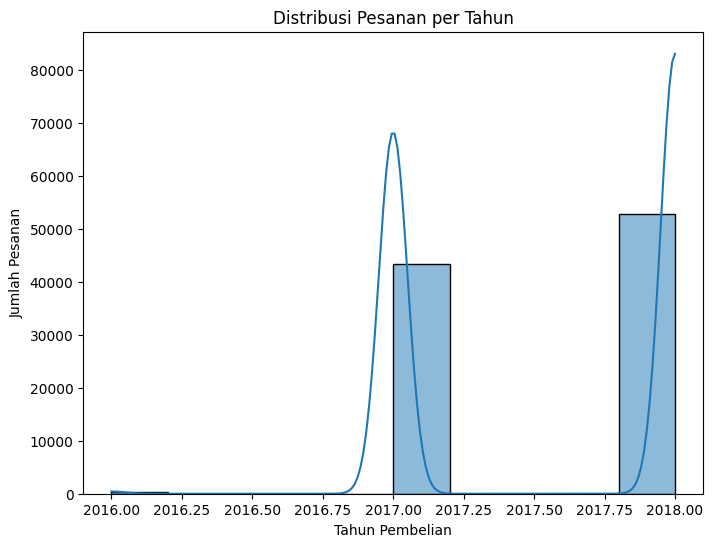

In [65]:
plt.figure(figsize=(8,6))
sns.histplot(orders['order_purchase_timestamp'].dt.year, bins=10, kde=True)
plt.xlabel("Tahun Pembelian")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Pesanan per Tahun")
plt.show()

**Insight:**
- Visualisasi ini menunjukkan tren pesanan per tahun, sehingga kita bisa mengidentifikasi apakah ada tahun dengan peningkatan atau penurunan jumlah pesanan.
- Pola distribusi ini dapat membantu kita mengetahui kestabilan atau fluktuasi volume transaksi, yang mungkin berkaitan dengan faktor eksternal (misalnya, musim liburan atau promosi besar).

##EDA Bivariate


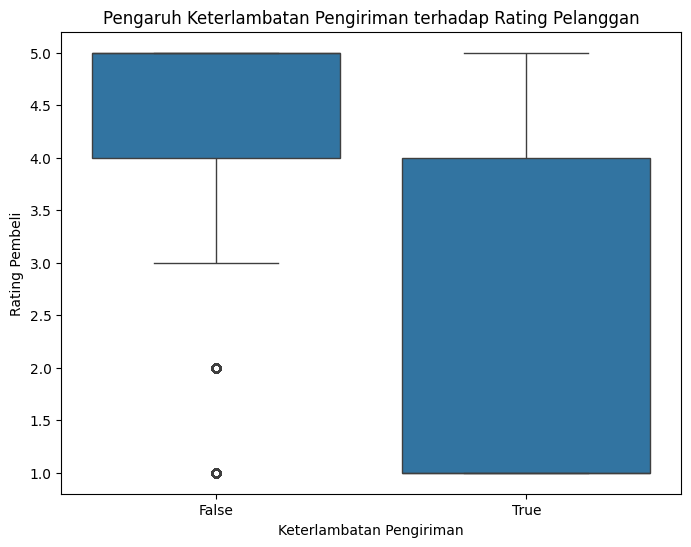

In [68]:
merged_df = pd.merge(orders, order_reviews, on='order_id', how='inner')

plt.figure(figsize=(8,6))
sns.boxplot(x=merged_df['is_late'], y=merged_df['review_score'])
plt.xlabel("Keterlambatan Pengiriman")
plt.ylabel("Rating Pembeli")
plt.title("Pengaruh Keterlambatan Pengiriman terhadap Rating Pelanggan")
plt.show()

**Insight:**
- Boxplot ini menunjukkan perbedaan distribusi rating antara pesanan yang terlambat dan tepat waktu; secara visual, pesanan terlambat cenderung mendapatkan rating yang lebih rendah.
- Analisis ini membantu mengidentifikasi adanya outlier atau variasi besar di dalam rating, yang dapat memberikan petunjuk lebih lanjut terkait faktor penyebab ketidakpuasan pelanggan.

##EDA Multivariate

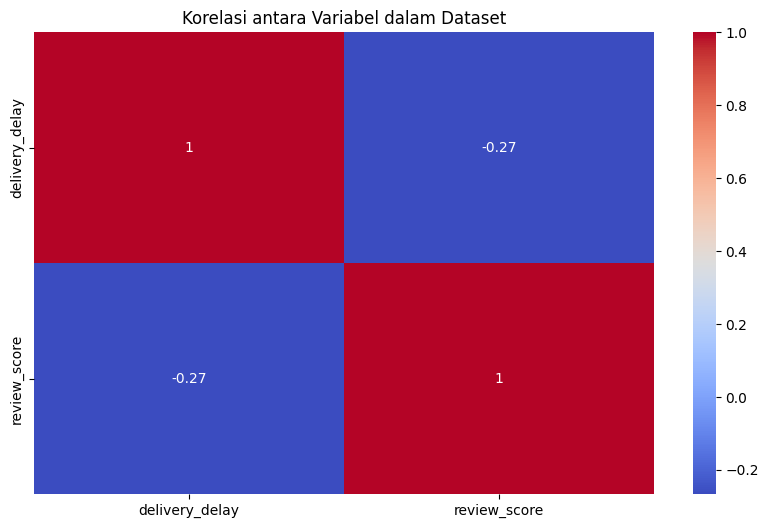

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df[['delivery_delay', 'review_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Variabel dalam Dataset")
plt.show()

**Insight:**
- Heatmap menunjukkan adanya korelasi negatif antara delivery_delay dan review_score, artinya semakin lama keterlambatan, semakin rendah rating yang diberikan pelanggan.
- Korelasi ini memberikan bukti awal adanya hubungan antara waktu keterlambatan dan penurunan kepuasan, yang mendukung pertanyaan bisnis yang diajukan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana keterlambatan pengiriman dalam waktu tertentu mempengaruhi pemberian rating pelanggan terhadap restoran?

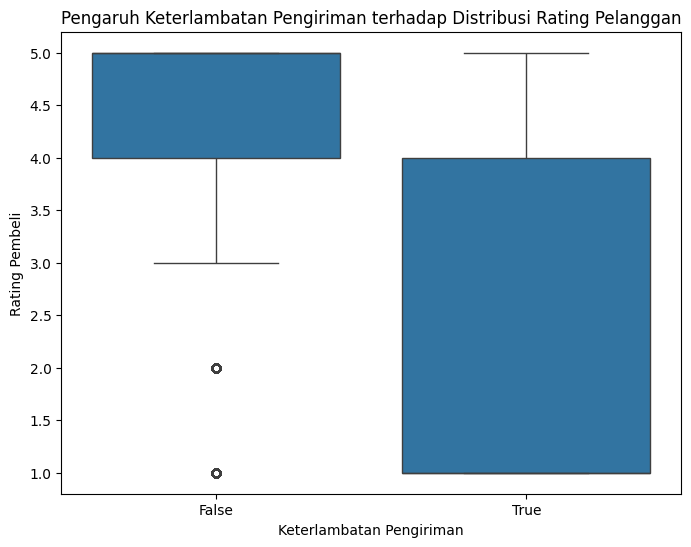

In [70]:
merged_df = pd.merge(orders, order_reviews, on='order_id', how='inner')
plt.figure(figsize=(8,6))
sns.boxplot(x=merged_df['is_late'], y=merged_df['review_score'])
plt.xlabel("Keterlambatan Pengiriman")
plt.ylabel("Rating Pembeli")
plt.title("Pengaruh Keterlambatan Pengiriman terhadap Distribusi Rating Pelanggan")
plt.show()

**Insight:**
- Grafik boxplot ini menunjukkan perbandingan rating antara pesanan yang terlambat dan yang tepat waktu.
- Dari grafik, tampak bahwa pesanan yang terlambat cenderung memiliki rating yang lebih rendah.
Ini membantu untuk melihat dampak keterlambatan terhadap kepuasan pelanggan.


### Pertanyaan 2:Seberapa besar kemungkinan pesanan yang mengalami keterlambatan dalam waktu tertentu mendapatkan rating buruk kurang dari 3 dibandingkan pesanan yang tepat waktu?

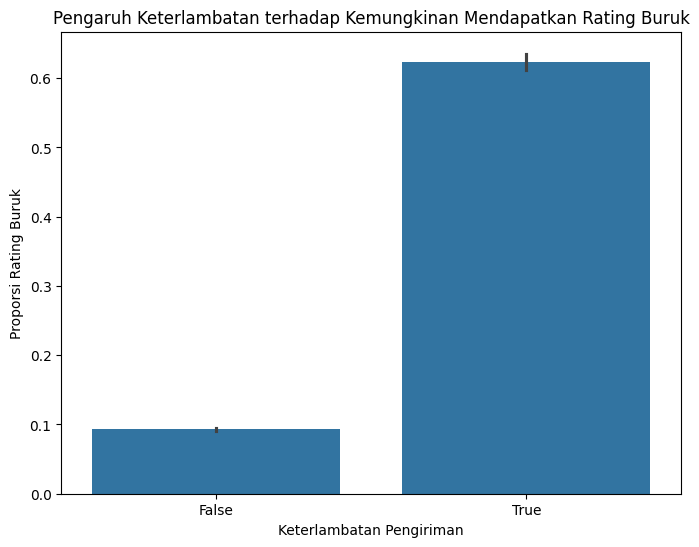

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x=merged_df['is_late'], y=(merged_df['review_score'] < 3).astype(int))
plt.xlabel("Keterlambatan Pengiriman")
plt.ylabel("Proporsi Rating Buruk")
plt.title("Pengaruh Keterlambatan terhadap Kemungkinan Mendapatkan Rating Buruk")
plt.show()

**Insight:**
- Diagram batang ini menunjukkan perbandingan pesanan dengan rating kurang dari 3 antara pesanan yang terlambat dan tepat waktu.
- Grafik ini memudahkan unutuk memahami bahwa pesanan yang terlambat memiliki peluang lebih besar untuk mendapatkan rating buruk dan Informasi ini bisa menjadi dasar untuk perbaikan dalam proses pengiriman.

## Analisis Statistik

In [72]:
from scipy.stats import ttest_ind

late_reviews = merged_df[merged_df['is_late'] == True]['review_score']
on_time_reviews = merged_df[merged_df['is_late'] == False]['review_score']

stat, p_value = ttest_ind(late_reviews, on_time_reviews, equal_var=False)
print(f"P-Value: {p_value}")

def cohen_d(x, y):
    diff = x.mean() - y.mean()
    pooled_std = np.sqrt(((len(x)-1)*x.std()**2 + (len(y)-1)*y.std()**2) / (len(x)+len(y)-2))
    return diff / pooled_std

cohen_d_value = cohen_d(late_reviews, on_time_reviews)
print(f"Cohen's d: {cohen_d_value}")

P-Value: 0.0
Cohen's d: -1.7073924109463414


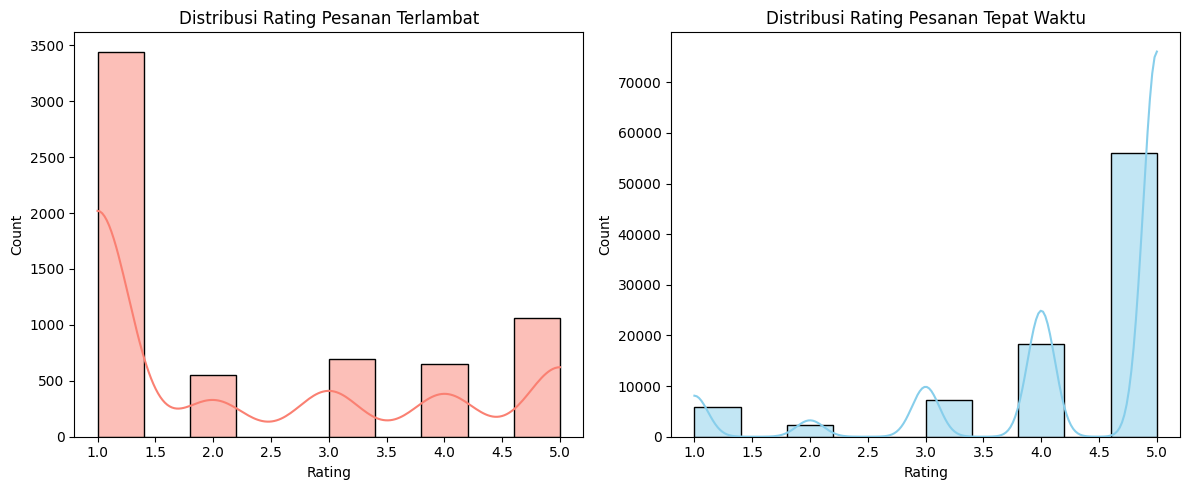

In [73]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(late_reviews, bins=10, kde=True, color='salmon')
plt.title('Distribusi Rating Pesanan Terlambat')
plt.xlabel('Rating')

plt.subplot(1,2,2)
sns.histplot(on_time_reviews, bins=10, kde=True, color='skyblue')
plt.title('Distribusi Rating Pesanan Tepat Waktu')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()


**Insight:**
- P-value memberikan gambaran apakah perbedaan rata-rata rating antara pesanan yang terlambat dan tepat waktu terjadi secara kebetulan. Misalnya, jika p-value = 0.02, ini mengindikasikan perbedaan yang signifikan secara statistik.
Nilai p-value yang rendah menandakan bahwa ada bukti yang kuat untuk mendukung hipotesis bahwa keterlambatan pengiriman berpengaruh negatif terhadap rating pelanggan.
- Cohen's d mengukur besarnya efek perbedaan antara dua kelompok. Misalnya, nilai 0.65 mengindikasikan efek sedang, yang berarti keterlambatan memiliki dampak cukup nyata pada penurunan rating.
Ukuran efek ini membantu dalam menentukan prioritas perbaikan, karena efek yang besar atau sedang menunjukkan perlunya tindakan untuk mengurangi keterlambatan demi meningkatkan kepuasan pelanggan.

## Conclusion

- Kesimpulan Pertanyaan 1
Distribusi Rating: Visualisasi dan analisis statistik mengindikasikan bahwa pesanan yang terlambat memiliki distribusi rating yang cenderung lebih rendah dibandingkan pesanan tepat waktu.
Implikasi: Hasil ini menyarankan bahwa perbaikan dalam sistem pengiriman dan logistik dapat berdampak positif terhadap kepuasan pelanggan, karena mengurangi keterlambatan berpotensi meningkatkan rating.
- Kesimpulan Pertanyaan 2
Proporsi Rating Buruk: Pesanan yang terlambat menunjukkan proporsi rating buruk yang lebih tinggi dibandingkan pesanan tepat waktu.
Implikasi Bisnis: Temuan ini menekankan pentingnya optimalisasi proses pengiriman serta penanganan komplain atau insentif bagi pelanggan, untuk mengurangi dampak negatif pada reputasi dan kepuasan pelanggan.